<div dir=rtl>

#  פרויקט קורס סקרנות
  מגישים: שי פרח ת.ז 025257957 , 
אלון מזרחי ת.ז 312284706

<div dir=rtl>

# עבור פרויקט זה נשתמש במסד הנתונים של האירוסים לסיווג מולטי-קלאס 

<div dir=rtl>

## טעינת הספריות

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from google.colab import data_table # Enables rendering of pandas dataframes into interactive displays
data_table.enable_dataframe_formatter()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats



<div dir=rtl>

## טעינת הנתונים 

In [ ]:
# load the dataset
path = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = read_csv(path)


<img src=https://camo.githubusercontent.com/74e378bb24b34efb63e8db09c4f073370d36f23aaa2c7580a805e93c881b78c2/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f6173736574732e6461746163616d702e636f6d2f626c6f675f6173736574732f4d616368696e652b4c6561726e696e672b522f697269732d6d616368696e656c6561726e696e672e706e67>

The Iris Dataset consists of 50 samples each of three different species of iris flower: setosa, versicolor and virginica. It contains four different measurements for each sample in centimetres - the length and width of sepals and petals - making it a multivariate dataset.
<img src=https://miro.medium.com/max/1400/1*2vTEJYgA9TnWPM81fBz7tw.webp>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# !pip install keras-rl2

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import EpsGreedyQPolicy
from tensorflow.random import set_seed
import warnings
warnings.filterwarnings('ignore')


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 2)

In [ ]:
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

y_train

array([0, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1,
       2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0,
       2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0,
       1, 0])

<div dir=rtl>

# חלק ג': 
## 8. פירמול הבעיה כבעיית סקרנות
- Learner - רשת נוירונים אשר מבצעת משימת קלסיפיקציה, בכל איטרציה הרשת מבצעת אימון מלא ומחזירה test loss שתלוי ב- State של הרשת שמאופיין על ידי ה- hyper-parameters.
- Actor - מודל RL אשר מטרתו ללמוד על העולם, כאשר במשימה שלנו על ה-Actor ללמוד כיצד כל אחד מה-hyper-parameters משפיע על אימון הרשת.
- State - מצב המערכת אשר מוגדר על ידי שלושה פרמטרים (hyper-parameters), גודל השכבות, מספר השכבות, קצב הלימוד (learning rate).
- Action - הפעולות שניתן לעשות - שינוי כל אחד מה-hyper-parameters. 
- Reward - מוגדר על ידי (delta loss) כאשר ככל שהפעולה גררה שינוי גדול יותר בדיוק הרשת (לטובה או לרעה) כך ה-Actor למד יותר על חשיבות הפעולה שביצע, בנוסף קיים פרמטר (gamma) אשר מקטין את ה-reward ככל שהאלגוריתם מבצע יותר איטרציות.

<div dir=rtl>

## לולאת הסקרנות

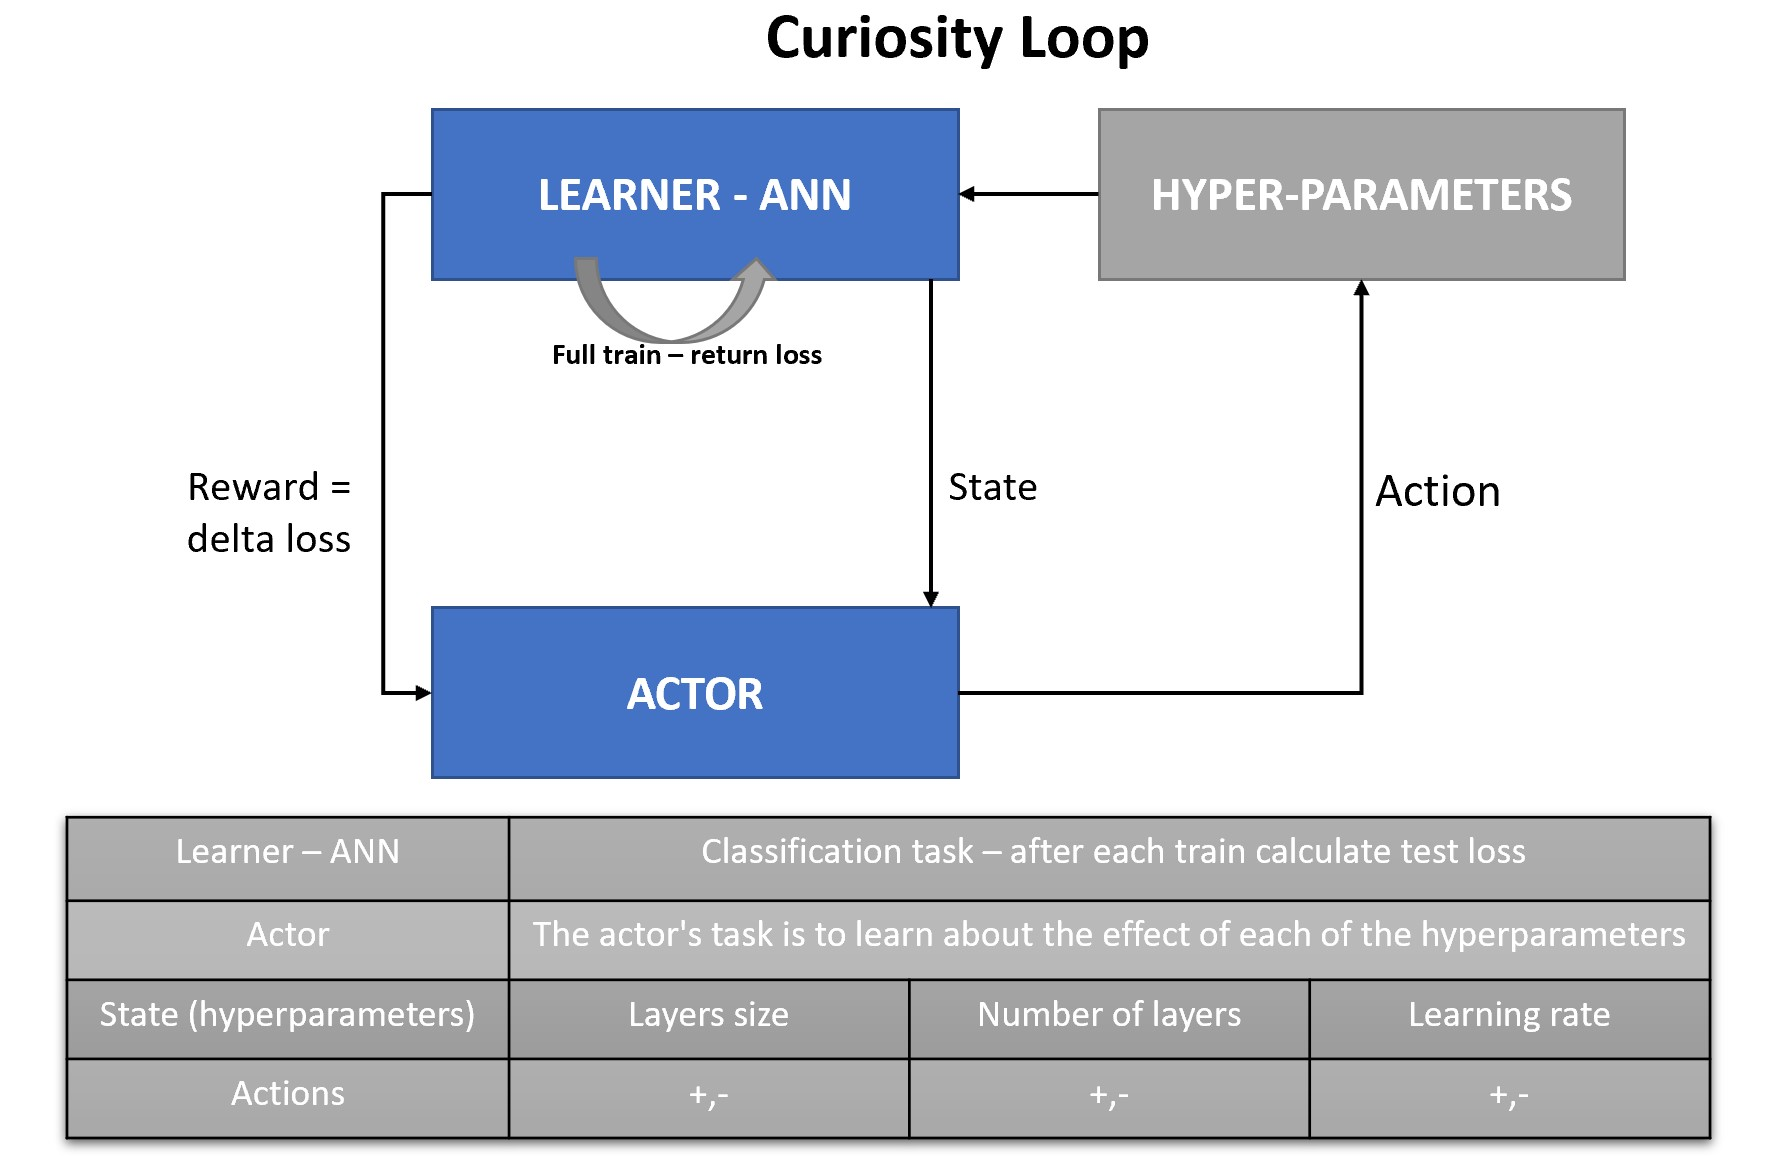

In [ ]:
# from IPython.display import Image

# Image(filename = f'/content/curiosity_loop.jpg', width = 800, height = 450)

<div dir=rtl>

## הגדרת ה-Learner
- רשת נוירונים כאשר הפרמטרים המשתנים הם: מספר השכבות, גודל כל שכבה, וקצב הלמידה.

In [ ]:
def Learner(n_hidden, s_hidden, lr): 
  set_seed(5)
  model = Sequential()
  n_features = 4
  activation_func = 'relu'
  s_hidden = int(s_hidden)
  n_hidden = int(n_hidden)
  model.add(Dense(s_hidden, input_dim=n_features, activation=activation_func, input_shape=(n_features,)))#, kernel_initializer=keras.initializers.RandomUniform(seed=5)))
  for i in range(n_hidden):
    model.add(Dense(s_hidden, activation=activation_func))#, kernel_initializer=keras.initializers.RandomUniform(seed=5)))
  model.add(Dense(3, activation='softmax'))#, kernel_initializer=keras.initializers.RandomUniform(seed=5)))

  optimizer = keras.optimizers.Adam(learning_rate=lr)

  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=20, batch_size=30, verbose=0)

  loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

  return model, (1-test_acc)

In [ ]:
# # check the learner
# for i in range(3):
#   model, e = Learner(5, 6, 0.01)
#   print(e)

<div dir=rtl>

## הגדרת ה-Reward
- ה-reward מוגדר על ידי השינוי ב-loss של ה-learner בין הרצה עם הפרמטרים בזמן t לבין הרצה עם הפרמטרים לאחר ביצוע ה-action בזמן t+1.

In [ ]:
def reward_function(last_loss, action, state):

    m, loss_1 = Learner(state[0], state[1], state[2])

    REWARD = 50*(last_loss - loss_1)

    if REWARD == 0: REWARD = -2

    # print(f'\nstate :{state}, action: {action}')
    # print(f'\nstate loss:{last_loss:.3f}, next state loss:{loss_1:.3f}, reward: {REWARD:.3f}')

    return loss_1, REWARD


<div dir=rtl>

## הגדרת ה-enviroment 
- הגדרת הסביבה שלנו (העולם), הפעולות האפשריות והמצבים.

In [ ]:
class MyEnv():
    def __init__(self):
        self.num_actions = 6  # Number of actions available to the agent
        self.state_shape = (1,3)  # Shape of the state space
        self.action = 0,
        self.state = np.array([1, 1, 0.001]) # n_hidden, s_hidden, lr
        self.done = False
        self.last_loss = 0.7111110985279083
        
    def step(self, action):

        self.action = action

        state_0 = np.copy(self.state)
        # Take the action
        if action == 0:
            self.state[0] += 1
            # Limit the states
            if(self.state[0]>20 or self.state[0]<1):
              self.state[0] = np.clip(self.state[0], 1, 20)
              reward = -5
            else: self.last_loss, reward = reward_function(self.last_loss, action, self.state)

        elif action == 1:
            self.state[0] -= 1
            # Limit the states
            if(self.state[0]>20 or self.state[0]<1):
              self.state[0] = np.clip(self.state[0], 1, 20)
              reward = -5
            else: self.last_loss, reward = reward_function(self.last_loss, action, self.state)

        elif action == 2:
            self.state[1] += 1
            # Limit the states
            if(self.state[1]>20 or self.state[1]<0):
              self.state[1] = np.clip(self.state[1], 0, 20)
              reward = -5
            else: self.last_loss, reward = reward_function(self.last_loss, action, self.state)
       
        elif action == 3:
            self.state[1] -= 1
            # Limit the states
            if(self.state[1]>20 or self.state[1]<0):
              self.state[1] = np.clip(self.state[1], 0, 20)
              reward = -5
            else: self.last_loss, reward = reward_function(self.last_loss, action, self.state)
        
        elif action == 4:
            self.state[2] *= 2
            # Limit the states
            if(self.state[2]>0.005 or self.state[2]<0.000001):
              self.state[2] = np.clip(self.state[2], 0.000001, 0.005)
              reward = -5
            else: self.last_loss, reward = reward_function(self.last_loss, action, self.state)
     
        else: # 5
            self.state[2] /= 2
            # Limit the states
            if(self.state[2]>0.005 or self.state[2]<0.000001):
              self.state[2] = np.clip(self.state[2], 0.000001, 0.005)
              reward = -5
            else: self.last_loss, reward = reward_function(self.last_loss, action, self.state)
          
        return self.state, reward, self.done, {}

    def render(self):
            # Get the current state and action
            state_ = self.state()
            action_ = self.action()

            # Plot/print the current state and action
            # print('state')
            # print(state_)            
            # print('action')
            # print(action_)
            return
    
    def reset(self):

        print('reset')
        self.state = np.array([1, 1, 0.001])
        self.done = False
        return self.state



<div dir=rtl>

## הגדרת ה-Actor
- הגדרת ה-actor בעזרת מודל של חבילת tensorflow.

In [ ]:
def RL_model(env):
  # Create RL the model
  model = Sequential()
  model.add(Dense(32, input_shape=env.state_shape, activation='relu'))
  model.add(Dense(32, activation='relu'))
  # model.add(Dense(18, activation='relu'))
  model.add(keras.layers.Flatten())
  model.add(Dense(env.num_actions, activation='linear'))
  # Compile the model
  model.compile(Adam(learning_rate=5e-3), loss='mse')
  return(model)

def RL_agent(env, model):
  # Create the memory
  memory = SequentialMemory(limit=50000, window_length=1)
  # Create the policy
  policy = EpsGreedyQPolicy()
  # Create the agent
  agent = DQNAgent(model=model, nb_actions=env.num_actions, memory=memory, nb_steps_warmup=10,
                  target_model_update=1e-2, policy=policy)
  # Compile the agent
  agent.compile(Adam(learning_rate=1e-3), metrics=['mse'])
  return agent

<div dir=rtl>

## הרצת האלגוריתם
- הרצת האלגוריתם על מנת ללמד את האקטור להגיע לפרמטרים הטובים ביותר במספר הצעדים הקטן ביותר.

In [ ]:
env = MyEnv()
rl_model = RL_model(env)
rl_agent = RL_agent(env, rl_model)

# Fit the agent
rl_agent.fit(env, nb_steps=200, visualize=False, verbose=1)


Training for 200 steps ...
reset
Interval 1 (0 steps performed)
  200/10000 [..............................] - ETA: 12:26:16 - reward: -1.7839done, took 910.844 seconds


In [ ]:
# Test the agent
# rl_agent.test(env, nb_episodes=5, visualize=False, nb_max_episode_steps=50)

<div dir=rtl>

## בדיקת המודל
- בדיקת המודל שהתקבל לאחר האימון, והצגת ה-Policy על ידי 3d-plot.

In [ ]:
# Get the agent's model
model = rl_agent.model

# Get the action probabilities for a given state
state = env.reset()
s = state[np.newaxis]
action_probabilities = model.predict(s[np.newaxis])
print(action_probabilities)
print(np.argmax(action_probabilities))


reset
[[-1.0368836  -1.7640139   0.57884896 -1.1226417  -0.55808306 -1.699446  ]]
2


In [ ]:
def mini_step(action, state):
    if action == 0:
        state[0,0] += 1
        # Limit the states
        state[0,0] = np.clip(state[0,0], 1, 20)
    elif action == 1:
        state[0,0] -= 1
        # Limit the states
        state[0,0] = np.clip(state[0,0], 1, 20)
    elif action == 2:
        state[0,1] += 1
        # Limit the states
        state[0,1] = np.clip(state[0,1], 0, 20)    
    elif action == 3:
        state[0,1] -= 1
        # Limit the states
        state[0,1] = np.clip(state[0,1], 0, 20)
    elif action == 4:
        state[0,2] *= 2
        # Limit the states
        state[0,2] = np.clip(state[0,2], 0.000001, 0.005)
    else: # 5
        state[0,2] /= 2
        # Limit the states
        state[0,2] = np.clip(state[0,2], 0.000001, 0.005)
    return state

In [ ]:
def get_the_next_point(point):
  np_p =  np.array(point)
  np_p = np_p[np.newaxis]
  action_probabilities = model.predict(np_p[np.newaxis])
  action = np.argmax(action_probabilities)
  next = mini_step(action, np_p)
  return next


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
def plot_vector_field(x_limits, y_limits, z_limits, starting_points, ending_points):
    # %matplotlib widget
    # Create the figure and 3D axes
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the vector field
    ax.quiver(starting_points[:,0], starting_points[:,1], starting_points[:,2],
              ending_points[:,0,0]-starting_points[:,0], 
              ending_points[:,0,1]-starting_points[:,1], 
              ending_points[:,0,2]-starting_points[:,2],
              length=0.0005, normalize=True, arrow_length_ratio =0.5)

     # Set the axis limits
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    ax.set_zlim(z_limits)
    ax.set_zlabel('Learning rate')
    ax.set_ylabel('Number hidden layers')
    ax.set_xlabel('Size hidden layers')
    ax.set_title('Actor Policy')
    
    # Show the plot
    plt.show()

In [ ]:
def plot_vector_field_2d(x_limits, y_limits, starting_points, ending_points):
    # Create the figure and 2D axes
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot()

    # Plot the vector field
    ax.quiver(starting_points[:,0], starting_points[:,1],
              ending_points[:,0,0]-starting_points[:,0], 
              ending_points[:,0,1]-starting_points[:,1], 
              color='blue',
              width=0.004, headwidth=0.05, headlength=0.001
              )
     # Set the axis limits
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    ax.set_ylabel('Number hidden layers')
    ax.set_xlabel('Size hidden layers')
    ax.set_title('Actor Policy')
    # Show the plot
    plt.show()

In [ ]:
s_1 = np.linspace(1, 20, 20) 
s_2 = np.linspace(0, 20, 21)
s_3 = np.array([0.000001])
for i in range(12):
    s_3 = np.hstack((s_3, s_3[i]*2))
s_3 = np.hstack((s_3, 0.005))
# s_3 = np.array([0.00002])
l = 0 
starting_points = []
ending_points = []
for i, s_11 in enumerate(s_1):
  for j, s_22 in enumerate(s_2):
    for k, s_33 in enumerate(s_3):
      starting_points.append([s_11,s_22,s_33])
      next_p = get_the_next_point(starting_points[l])
      ending_points.append(next_p)
      l +=1

starting_points = np.array(starting_points)
ending_points =  np.array(ending_points)



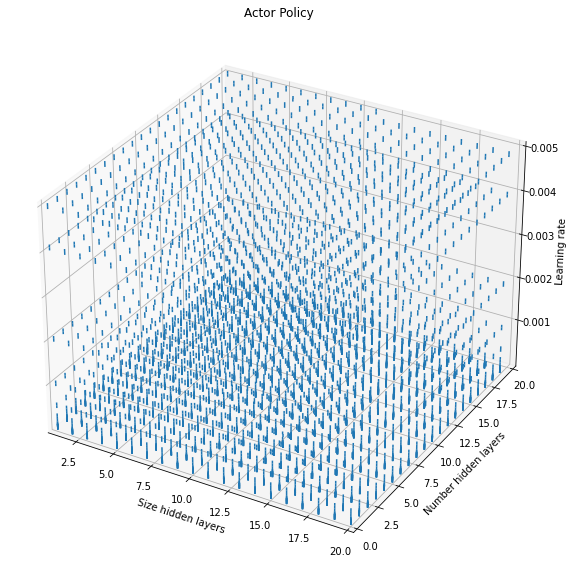

In [ ]:
plot_vector_field([1, 20], [0, 20], [0.000001, 0.005], starting_points, ending_points)

<div dir=rtl>

## פלוטים
- בוצע פלוט עבור השדה הוקטורי שמייצג את ה-policy שהתקבל, מכיוון שהפלוט לא מובן לגמרי בוצע חתך אשר מציג את אותו פלוט עבור קצב עדכון קבוע lr = 0.00002, בחתך זה ניתן לראות את אופי ה-policy. בנוסף ניתן לראות כי יש התכנסות לנקודה מעניינת, נקודה אופטימלית אשר לא נמצאת בגודל הרשת המקסימלי שנבדק. 

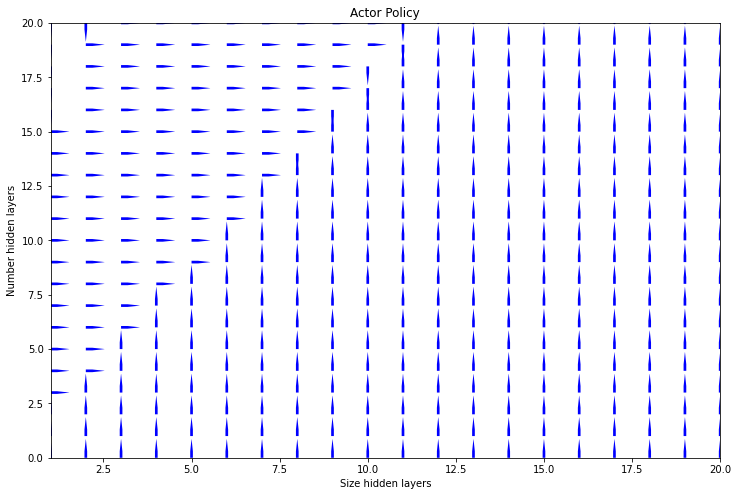

In [ ]:
plot_vector_field_2d([1, 20], [0, 20], starting_points, ending_points) # lr = 0.00002